### **[LeetCode Link](https://leetcode-cn.com/problems/sudoku-solver/solution/jie-shu-du-by-leetcode/)**

## 回溯法
***约束编程***
* 在放置每个数字时都设置约束。在数独上放置一个数字后立即排除当前行，列和子方块对该数字的使用。这会传播约束条件并有利于减少需要考虑组合的个数。
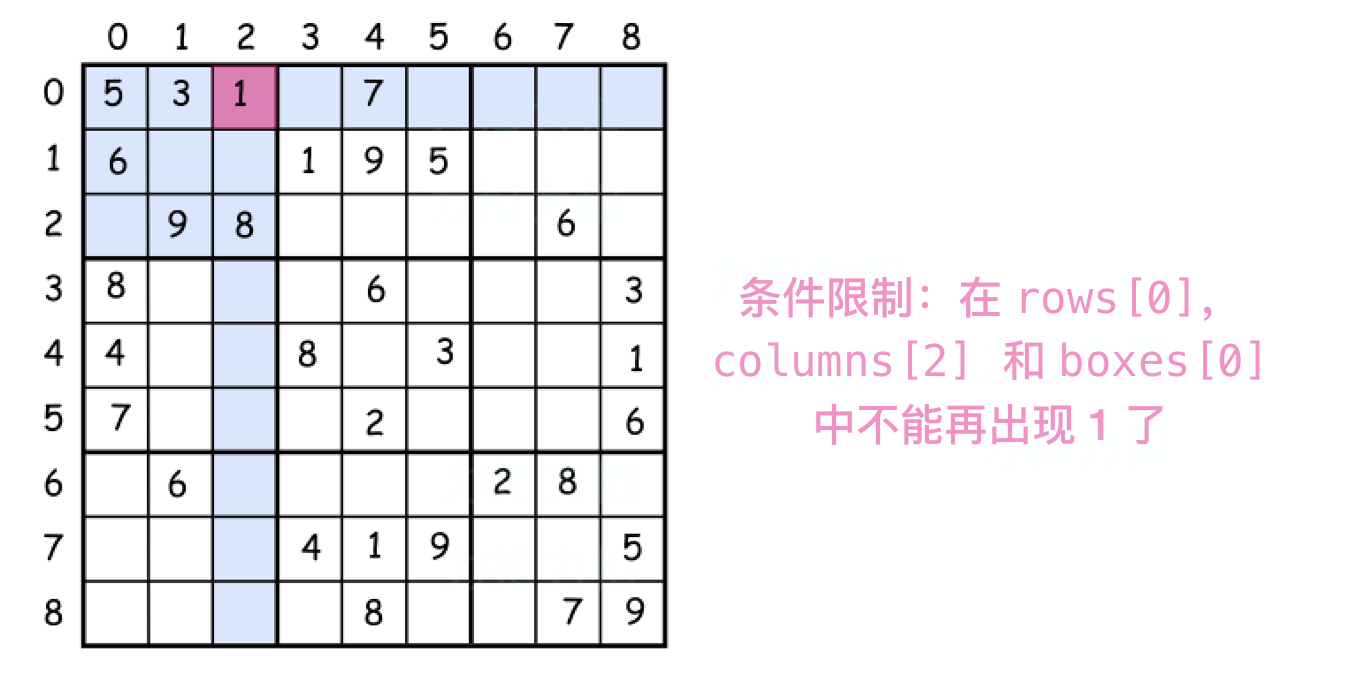
***回溯***
* 让我们想象一下已经成功放置了几个数字在数独上。但是该组合不是最优的并且不能继续放置数字了。该怎么办？**回溯**。意思是回退，来改变之前放置的数字并且继续尝试。如果还是不行，再次**回溯**。
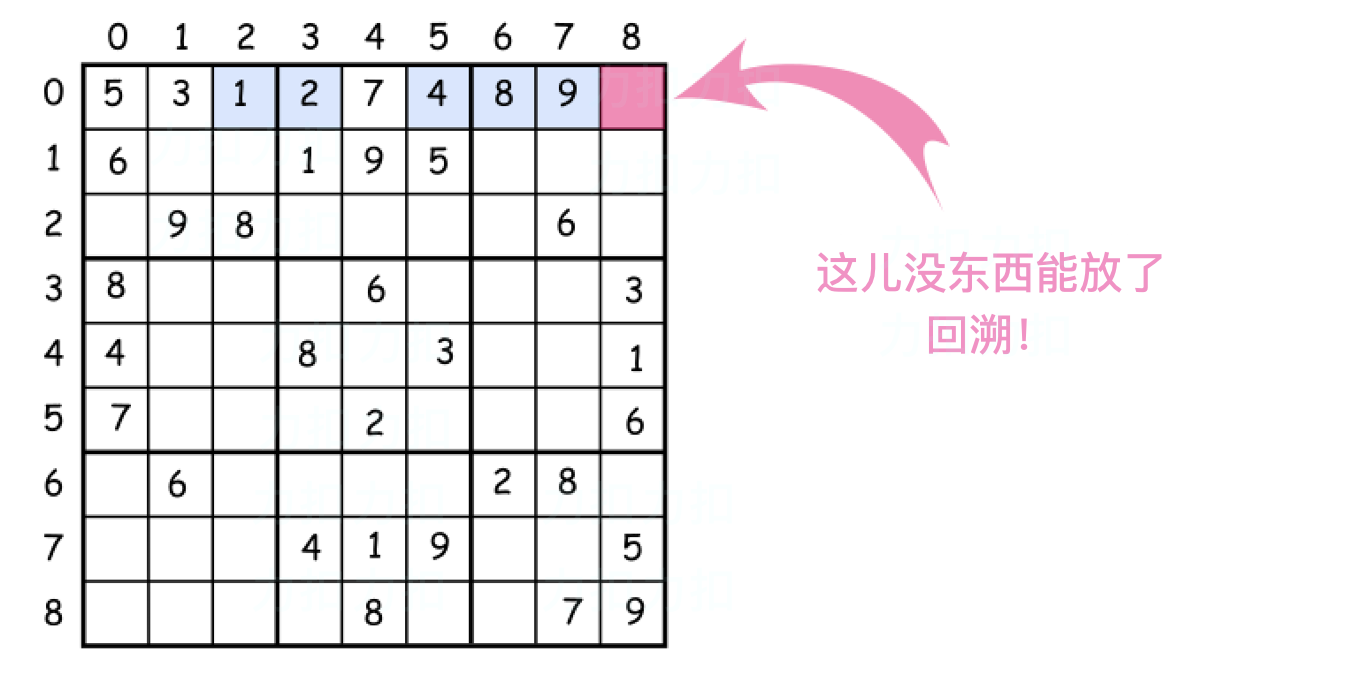

In [25]:
from collections import defaultdict


class Solution:
    def solveSudoku(self, board):
        """
        逐行，从左到右，在每一个位置上试探1-9，成功就进入下一个位置，失败就取消本次选择，做下一个选择
        当前行试探完毕就换行，直到换到最后一行
        """
        def could_place(d, row, col):
            """
            若所填数字已在该行、列或单元中出现，返回False
            """
            return not (d in rows[row] or d in columns[col] or \
                    d in boxes[box_index(row, col)])
        
        def place_number(d, row, col):
            """
            Place a number d in (row, col) cell
            """
            rows[row][d] += 1
            columns[col][d] += 1
            boxes[box_index(row, col)][d] += 1
            board[row][col] = str(d)
            
        def remove_number(d, row, col):
            """
            Remove a number which didn't lead 
            to a solution
            """
            del rows[row][d]
            del columns[col][d]
            del boxes[box_index(row, col)][d]
            board[row][col] = '.'    
            
        def place_next_numbers(row, col):
            """
            Call backtrack function in recursion
            to continue to place numbers
            till the moment we have a solution
            """
            # if we're in the last cell
            # that means we have the solution
            if col == N - 1 and row == N - 1:
                nonlocal sudoku_solved
                sudoku_solved = True
            #if not yet    
            else:
                # if we're in the end of the row
                # go to the next row
                if col == N - 1:
                    backtrack(row + 1, 0)
                # go to the next column
                else:
                    backtrack(row, col + 1)
                
                
        def backtrack(row = 0, col = 0):
            """
            Backtracking
            """
            # if the cell is empty
            if board[row][col] == '.':
                # iterate over all numbers from 1 to 9
                for d in range(1, 10):
                    if could_place(d, row, col):
                        place_number(d, row, col)
                        place_next_numbers(row, col)
                        # 逐层嵌套，若最开始填的数字的解法失败，则sudoku_solved仍为初始的False
                        # 若最后一个空格子所填数的解法成功，则sudoku_solved返回True
                        if not sudoku_solved:
                            remove_number(d, row, col)
            else:
                place_next_numbers(row, col)
                    
        # box size
        n = 3
        # row size
        N = n * n
        # lambda function to compute box index
        box_index = lambda row, col: (row // n ) * n + col // n

        # init rows, columns and boxes
        rows = [defaultdict(int) for i in range(N)]
        columns = [defaultdict(int) for i in range(N)]
        boxes = [defaultdict(int) for i in range(N)]
        for i in range(N):
            for j in range(N):
                if board[i][j] != '.': 
                    d = int(board[i][j])
                    place_number(d, i, j)
        sudoku_solved = False
        backtrack()
        return board

In [24]:
slove = Solution()
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
slove.solveSudoku(board)

[['5', '3', '4', '6', '7', '8', '9', '1', '2'],
 ['6', '7', '2', '1', '9', '5', '3', '4', '8'],
 ['1', '9', '8', '3', '4', '2', '5', '6', '7'],
 ['8', '5', '9', '7', '6', '1', '4', '2', '3'],
 ['4', '2', '6', '8', '5', '3', '7', '9', '1'],
 ['7', '1', '3', '9', '2', '4', '8', '5', '6'],
 ['9', '6', '1', '5', '3', '7', '2', '8', '4'],
 ['2', '8', '7', '4', '1', '9', '6', '3', '5'],
 ['3', '4', '5', '2', '8', '6', '1', '7', '9']]